# 3.1 教師なし学習の種類

教師情報を用いないすべての種類の機械学習のこと。ここでは二つの用途について記載する。    
１、データセットの変換    
２、クラスタリング    
    
次元削減は高次元のデータを少量の特徴表現に変換。    
データを構成する要素や成分を見つける。トピックモデルの場合は文章にどのトピックがあるのかを調べる。    

クラスタリングはデータを似たような要素から構成されるグループに分ける。    
同じ自分つが写っている写真をまとめるなど。
    


# 3.2 教師なし学習の評価がむずかしい

ラベル情報が与えれないことが前提のため、出力がどうあるべきなのか判断が難しい。    
人間が合っているかを確かめる必要がある場合が多い。    
よって大きなシステムの一部として利用されるよりも、データをより理解するために用いられたり前処理に使われることが多い。    
データを変換して学習することで教師あり学習の精度が上がったりする。

## 3.3 前処理とスケール変換

ニューラルネットやsvmはデータのスケールに敏感なのでスケール変換の前処理を入れる。

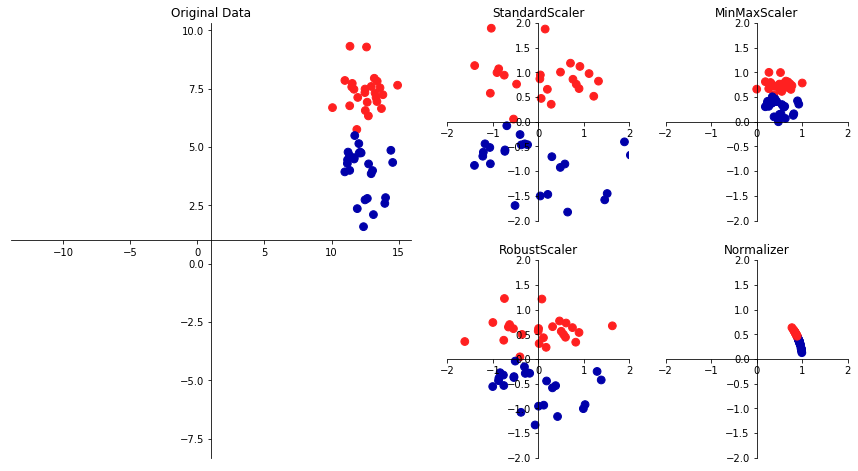

In [1]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
mglearn.plots.plot_scaling()
plt.show()

### 様々な前処理

- StanderdScaler
    - 特徴: 個々の特徴量を平均0分散が1になるように変換する
    - 問題点: Min, Maxが一定の範囲に入ることを保証するわけではない
- RobustScaler
    - 特徴: 分散の代わりに中央値と四分位数を用いる -> 外れ値を無視
- MinMaxScaler
    - 特徴: データが全て0~1の範囲に定まるように変換する
- Normalizer
    - 特徴: 特徴量ベクトルがユークリッド長1になるようにする -> ベクトルの長さではなく角度が問題になる場合に用いられる

## データ変換の適用

SVMに入れるデータのスケールの変換を行う。

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [8]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

transformでスケール変換。fit_transformの方が早いらしい。

In [10]:
X_train_scaled = scaler.transform(X_train)
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 1.038e+01 4.379e+01 1.435e+02 5.263e-02 2.650e-02 0.000e+00
 0.000e+00 1.167e-01 5.025e-02 1.144e-01 3.602e-01 7.570e-01 6.802e+00
 2.667e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 9.502e-04 7.930e+00
 1.249e+01 5.041e+01 1.852e+02 8.409e-02 4.327e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.264e-01
 1.913e-01 2.906e-01 9.575e-02 2.873e+00 3.647e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 5.774e-01 2.075e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [11]:
X_test_scaled = scaler.transform(X_test)

print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.07648256 -0.02318339  0.07117684  0.03295864  0.08919383 -0.02232675
  0.          0.         -0.06152961 -0.00637363 -0.00105126  0.00079104
  0.00067851  0.00079567 -0.0335172  -0.01134793  0.          0.
  0.0233157  -0.00191763  0.03635717 -0.01268556  0.03107724  0.01349292
 -0.09327846 -0.01574803  0.          0.          0.00023759  0.01252788]
per-feature maximum after scaling:
[0.8173127  0.76435986 0.84589869 0.68610817 0.83118173 0.89338351
 1.00093809 1.05175118 1.07705578 1.03714286 0.50554629 1.37665815
 0.44117231 0.4224857  0.72596002 0.77972564 0.38762626 0.66054177
 0.75389768 0.75839224 0.80896478 0.88852901 0.75696001 0.66869839
 0.9075879  0.81108275 0.61717252 0.88487973 1.20527441 0.77371114]


## 訓練データとテストデータを同じように変換する

学習データとテストデータのスケールを同じにすることは重要。    
scatterで散布図の描画。

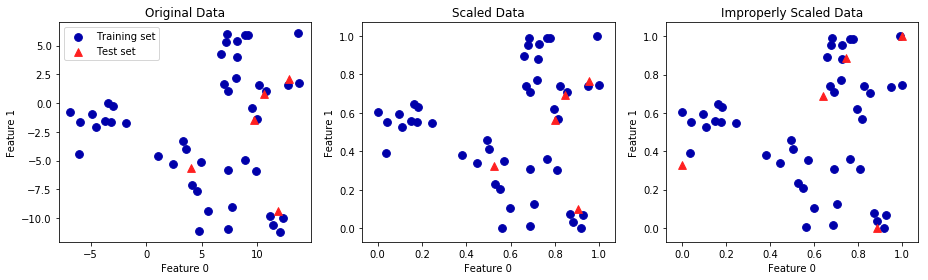

In [13]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# テストセットを訓練セットとは別にスケール変換
# 実際にはしてはいけない
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

plt.show()

# Improperly Scaled Dataの図は他の図と明らかに異なっている=> 駄目です

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 同じだがfit_transformの方が効率的に計算できる場合がある
X_scaled = scaler.fit(X_train).transform(X_train)
X_scaled_d = scaler.fit_transform(X_train)

### 教師あり学習における前処理の効果

スケールに敏感なsvmモデルにてスケールを合わせてない状態では６割の精度。

In [16]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


スケール０〜１に変換すると９割の精度へ。trainとtestでスケールを合わせること。

In [17]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


平均を０分散を１に変換。

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96
